In [2]:
import random
import numpy as np

In [3]:
random.random()

0.5742156253299212

In [9]:
numInputVec = int(input("Enter number of input vectors:"))
numInputComp=  int(input("Enter the number of components for input vectors:"))
numOutputNeurons = int(input("Number of output neurons"))


Enter number of input vectors: 5
Enter the number of components for input vectors: 4
Number of output neurons 2


In [10]:

inputVec =[]

for i in range(numInputVec):
    temp=[]
    for j in range(numInputComp):
        temp.append(random.random()*10)
    inputVec.append(temp)

inputVec = np.array(inputVec)
inputVec

array([[2.88177502, 1.30820423, 9.1964306 , 5.38788528],
       [2.3050414 , 8.71457649, 7.41427562, 4.19496607],
       [8.75001227, 4.87677702, 8.28700448, 1.07957626],
       [9.20351911, 9.63913274, 6.17595282, 2.65869171],
       [3.03736321, 4.48568584, 1.89926507, 8.02591996]])

In [11]:
weights =  inputVec[:numOutputNeurons]
weights

array([[2.88177502, 1.30820423, 9.1964306 , 5.38788528],
       [2.3050414 , 8.71457649, 7.41427562, 4.19496607]])

In [15]:
for ipv in inputVec:
    distance =[]
    for w in weights:
        distance.append(sum((ipv-w)**2))
    winningVal = min(distance)
    winningIdx = distance.index(winningVal)
    weights[winningIdx]+=ipv - weights[winningIdx]
weights

array([[9.20351911, 9.63913274, 6.17595282, 2.65869171],
       [3.03736321, 4.48568584, 1.89926507, 8.02591996]])

# Given by maam

In [43]:
from minisom import MiniSom
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [26]:
data = load_wine()
x = data.data
y = data.target
xScaled = (x-x.min())/ (x.max()-x.min())
x.shape

(178, 13)

In [28]:
val = np.sqrt(x.shape[0])*5
val

numOfRowCol =0
for i in range(20):
    if i**2< val and (i+1)**2 >val:
        numOfRowCol = i+1
numOfRowCol

9

In [29]:
model = MiniSom(x=numOfRowCol, y=numOfRowCol, input_len= x.shape[1], sigma=4,learning_rate=0.6)
model.random_weights_init(xScaled)
model.train_random(xScaled,200)


Text(0.5, 1.0, 'Whyy')

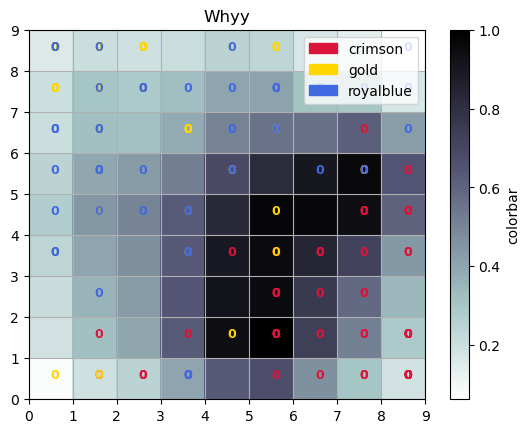

In [44]:
plt.pcolor(model.distance_map().T,cmap="bone_r")
plt.colorbar(label="colorbar")
colors =["crimson", "gold", "royalblue"]
labels = [colors[i] for i in y]

for idx,x in enumerate(xScaled):
    winner = model.winner(x)
    plt.text(winner[0]+0.5, winner[1]+0.5, str(y[i]),color=labels[idx],fontdict={"weight":"bold", "size":9})
legend = [Patch(color=c, label=c )  for c in colors]
plt.legend(handles=legend, loc="upper right")
plt.grid()
plt.title("Whyy") 